# Import necessary libraries

In [12]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score, recall_score, f1_score

# Read the dataset

In [13]:
data = pd.read_csv('Financial Distress.csv')
data.head()

,Company,Time,Financial Distress,x1,x2,x3,x4,x5,x6,x7,...,x74,x75,x76,x77,x78,x79,x80,x81,x82,x83
0,1,1,0.010636,1.2810,0.022934,0.87454,1.21640,0.060940,0.188270,0.52510,...,85.437,27.07,26.102,16.000,16.0,0.2,22,0.060390,30,49
1,1,2,-0.455970,1.2700,0.006454,0.82067,1.00490,-0.014080,0.181040,0.62288,...,107.090,31.31,30.194,17.000,16.0,0.4,22,0.010636,31,50
2,1,3,-0.325390,1.0529,-0.059379,0.92242,0.72926,0.020476,0.044865,0.43292,...,120.870,36.07,35.273,17.000,15.0,-0.2,22,-0.455970,32,51
3,1,4,-0.566570,1.1131,-0.015229,0.85888,0.80974,0.076037,0.091033,0.67546,...,54.806,39.80,38.377,17.167,16.0,5.6,22,-0.325390,33,52
4,2,1,1.357300,1.0623,0.107020,0.81460,0.83593,0.199960,0.047800,0.74200,...,85.437,27.07,26.102,16.000,16.0,0.2,29,1.251000,7,27


# Data Analysis

In [14]:
# Shape of the DataFrame
print("\nShape of the DataFrame:")
print(data.shape)

# Data types of the first few rows
print("\nData types of the first few rows:")
print(data.iloc[:5, :5].dtypes)

# Find total number of companies in the dataset
total_companies = len(data.groupby('Company')['Company'].nunique())
print("\nTotal Companies:", total_companies)

# Find number of distressed companies
distress_companies = data[data['Financial Distress'] <= -0.5]
num_distress = distress_companies['Company'].unique()
print("\nDistressed Companies:",len(num_distress))

# Check if there are any missing values
print("\nTotal missing values:", data.isna().sum().sum())

# Summary of dataset
print("\nSummary:\n", data.describe())


Shape of the DataFrame:
(3672, 86)

Data types of the first few rows:
Company                 int64
Time                    int64
Financial Distress    float64
x1                    float64
x2                    float64
dtype: object

Total Companies: 422

Distressed Companies: 136

Total missing values: 0

Summary:
            Company         Time  Financial Distress           x1           x2  \
count  3672.000000  3672.000000         3672.000000  3672.000000  3672.000000   
mean    182.084423     7.528322            1.040257     1.387820     0.129706   
std     117.024636     4.064016            2.652227     1.452926     0.120013   
min       1.000000     1.000000           -8.631700     0.075170    -0.258080   
25%      80.000000     4.000000            0.172275     0.952145     0.048701   
50%     168.000000     7.000000            0.583805     1.183600     0.107530   
75%     264.250000    11.000000            1.351750     1.506475     0.188685   
max     422.000000    14.000000 

## Plot Company vs Financial Distress

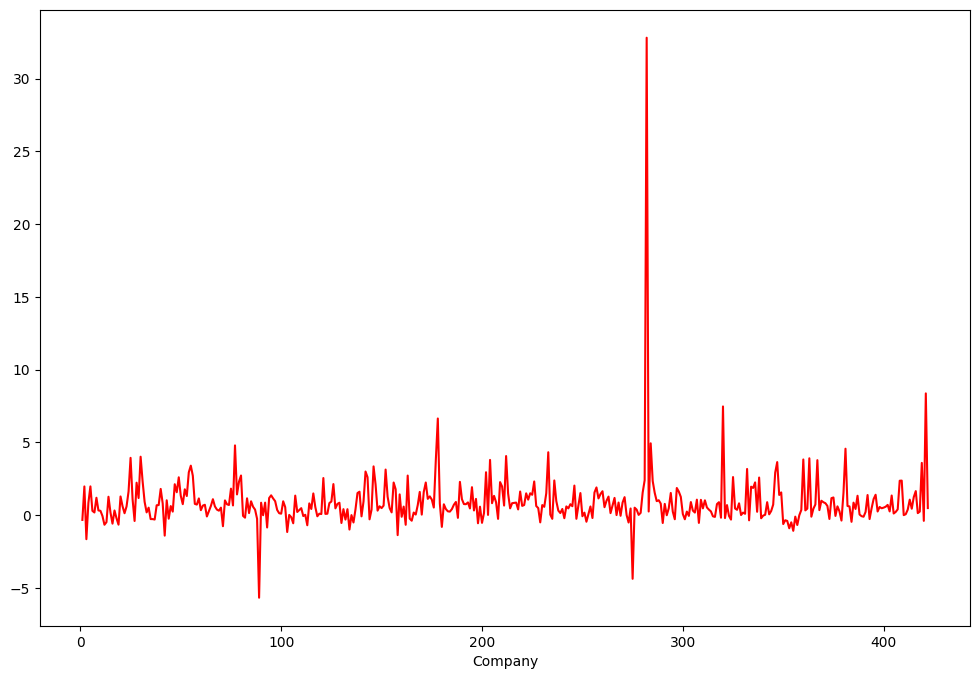

In [15]:
f, ax = plt.subplots(figsize= (12,8))
# group data based on company attribute
data_group_company = data.groupby(['Company'])

# select only the financial distress attribute and take mean of those values
data_group_company = data_group_company['Financial Distress'].mean().plot(c='red')

# plot
plt.show()

In [16]:
# Calculate correlation matrix for the dataset
corr_matrix = data.drop(labels= ['Time', 'Company'], axis =1).corr()
df = data.drop(labels= ['Time', 'Company'], axis =1)
corr_matrix

,Financial Distress,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x74,x75,x76,x77,x78,x79,x80,x81,x82,x83
Financial Distress,1.000000,0.030928,0.272978,-0.089264,0.116837,0.274435,0.077260,0.042412,-0.006382,0.219091,...,-0.018746,0.110030,0.113511,0.096058,-0.013891,-0.116661,0.048210,0.442916,-0.010369,0.007209
x1,0.030928,1.000000,0.208851,-0.440321,-0.035504,0.109543,0.535425,0.914489,0.007329,-0.000506,...,0.007974,0.135594,0.138233,0.119818,0.066994,-0.045919,0.101691,0.053595,-0.067678,-0.087026
x2,0.272978,0.208851,1.000000,-0.504509,0.114046,0.892480,0.298078,0.214098,0.014020,0.729858,...,0.014677,0.010825,0.019887,0.034792,-0.009057,-0.104102,0.002707,0.281884,-0.144404,-0.095881
x3,-0.089264,-0.440321,-0.504509,1.000000,0.094481,-0.356252,-0.593620,-0.398730,-0.006290,-0.030976,...,0.014103,-0.227217,-0.227341,-0.174159,-0.041958,0.102163,0.023445,-0.111055,0.067579,0.107194
x4,0.116837,-0.035504,0.114046,0.094481,1.000000,0.194218,0.068274,-0.054573,-0.013797,0.135739,...,0.025610,0.084316,0.088898,0.091231,0.057900,-0.044051,-0.001579,0.203058,-0.041700,0.022684
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
x79,-0.116661,-0.045919,-0.104102,0.102163,-0.044051,-0.120217,-0.084758,-0.017951,0.036357,0.005528,...,-0.047490,-0.060471,-0.086835,-0.097437,0.527218,1.000000,-0.005852,-0.122266,-0.045728,-0.024067
x80,0.048210,0.101691,0.002707,0.023445,-0.001579,0.032084,0.126731,0.105686,0.004143,0.036929,...,0.012109,0.050148,0.051157,0.048959,0.039691,-0.005852,1.000000,0.039511,-0.012114,0.020329
x81,0.442916,0.053595,0.281884,-0.111055,0.203058,0.266739,0.101647,0.064812,-0.000214,0.181116,...,0.002413,0.159350,0.162778,0.134828,0.020161,-0.122266,0.039511,1.000000,-0.006151,0.001491
x82,-0.010369,-0.067678,-0.144404,0.067579,-0.041700,-0.144725,-0.076454,-0.080588,0.011114,-0.126204,...,0.007201,0.152981,0.150870,0.115171,0.033218,-0.045728,-0.012114,-0.006151,1.000000,0.647209


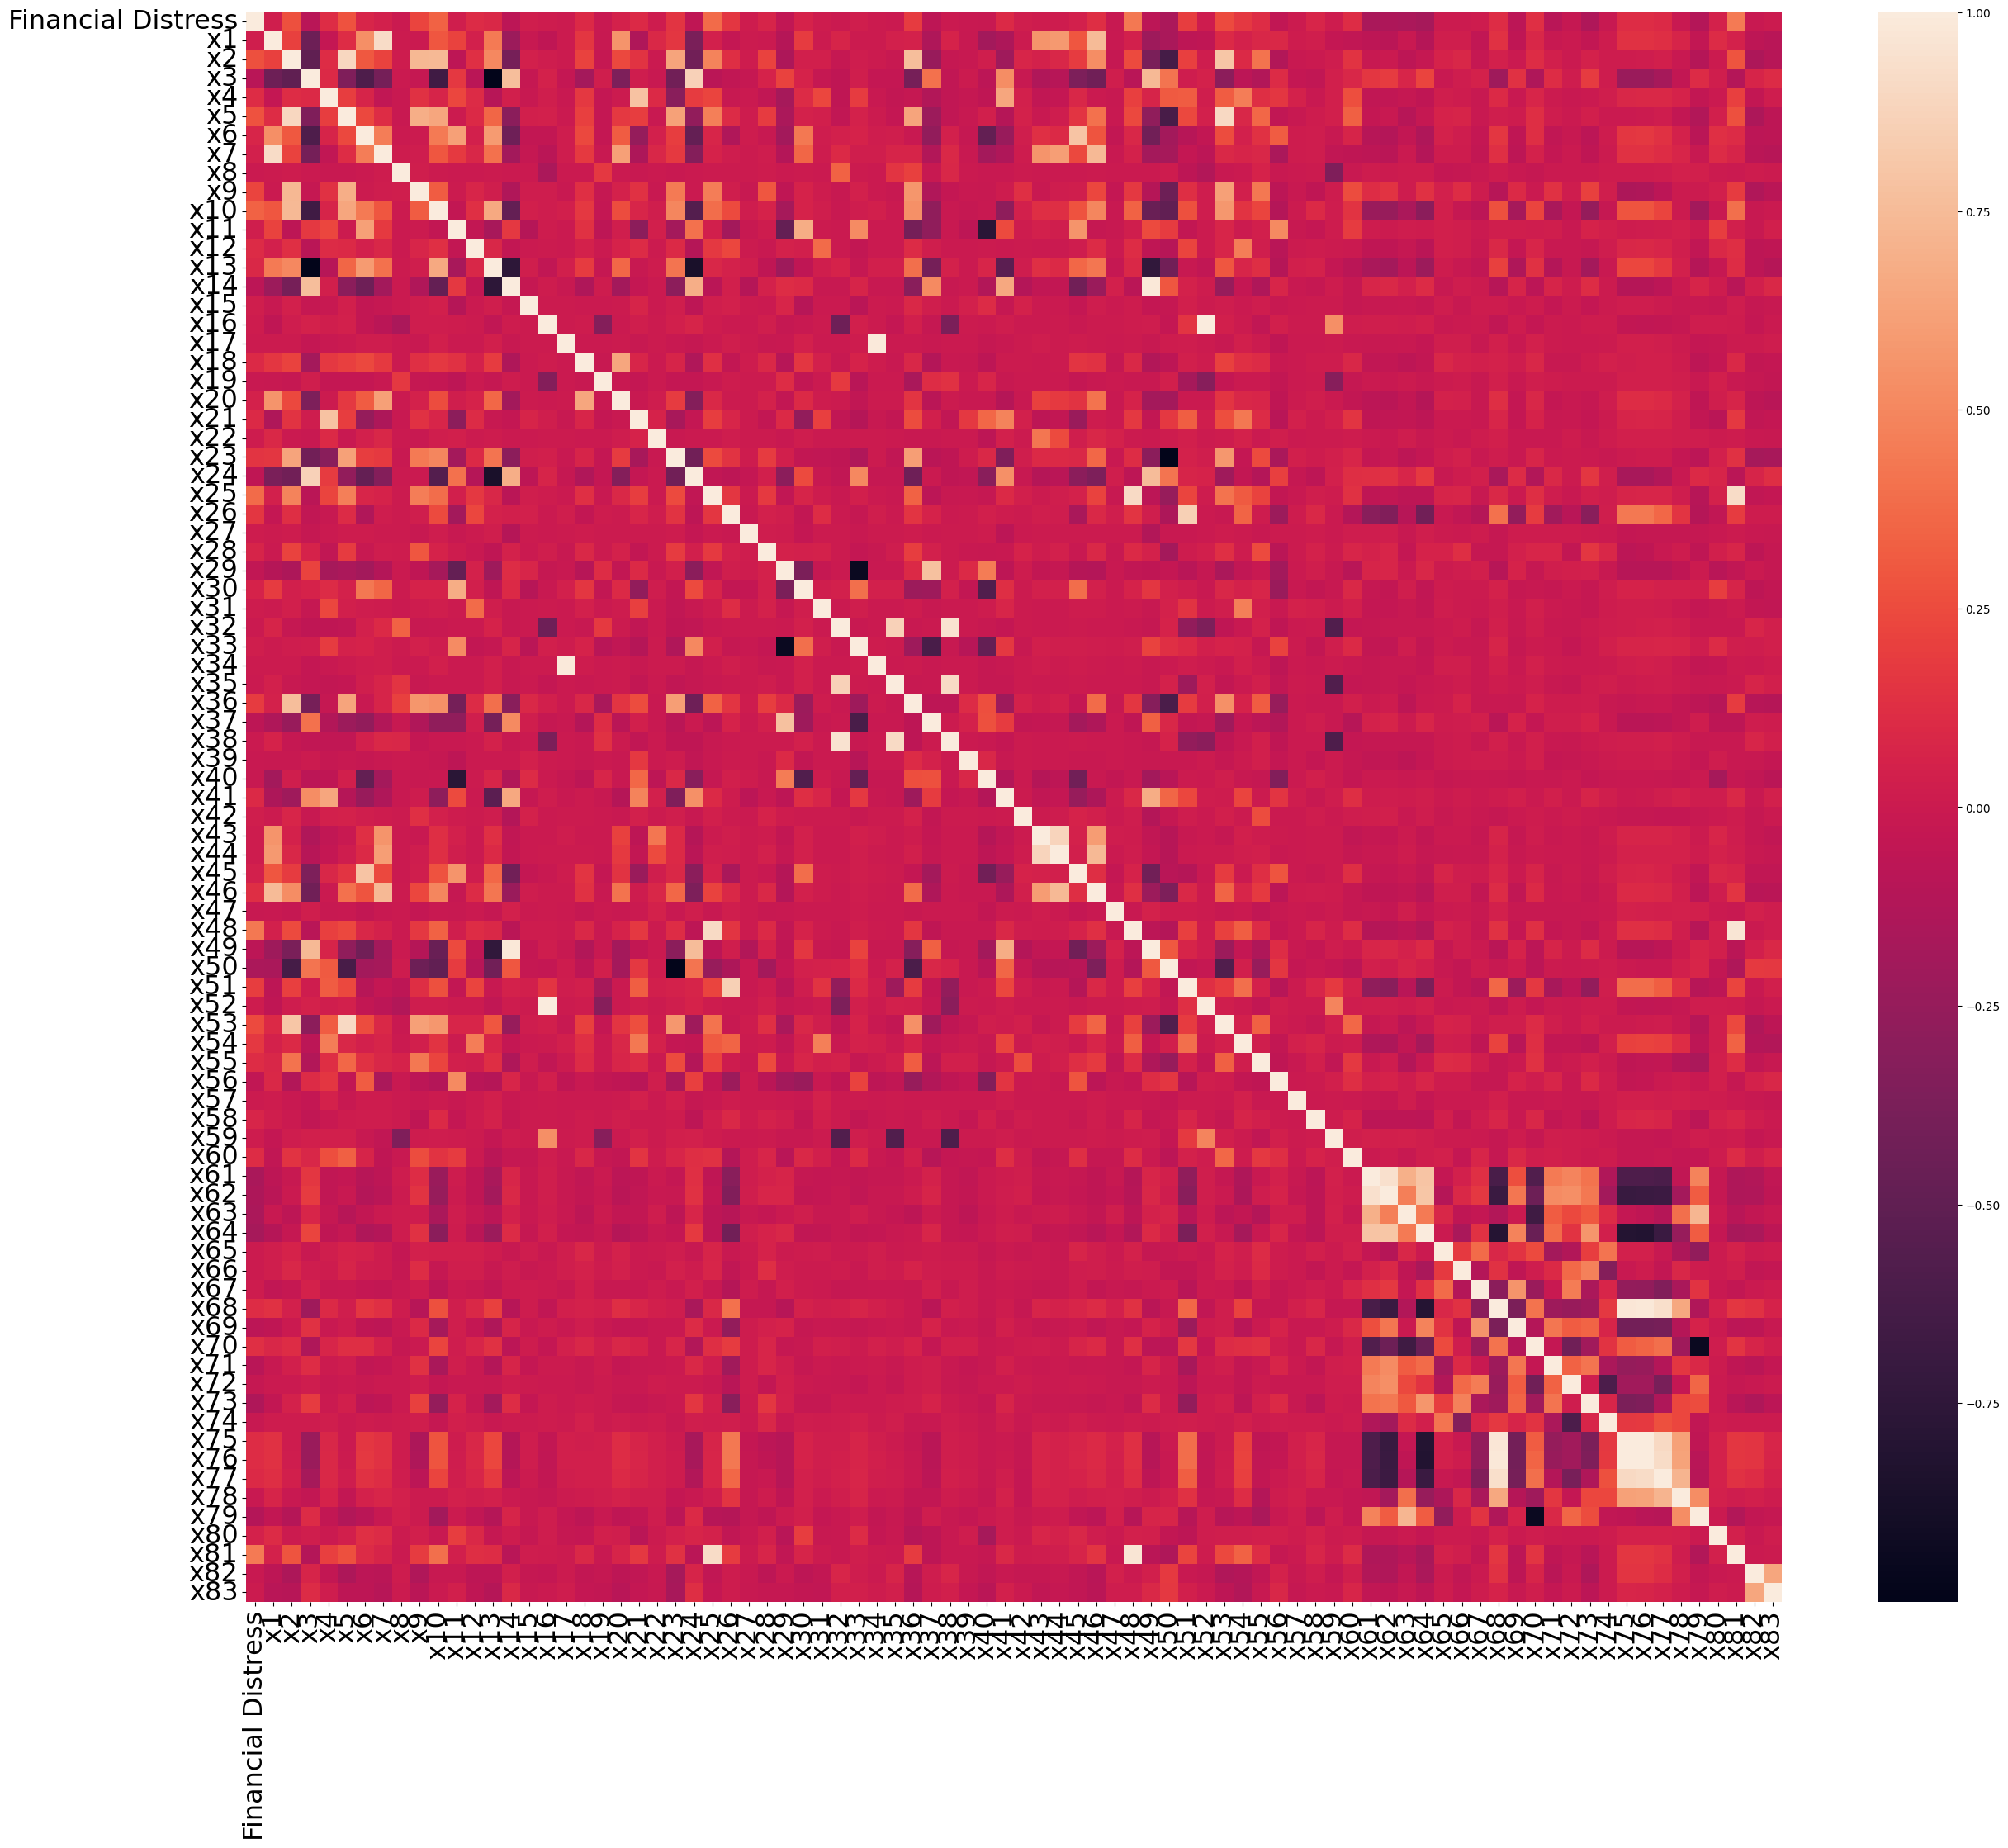

In [17]:
# Plot the correlation matrix as a heatmap
f, ax = plt.subplots(figsize= (30,25))
sns.heatmap(corr_matrix)
plt.xticks(fontsize = 23)
plt.yticks(fontsize = 23)
plt.show()

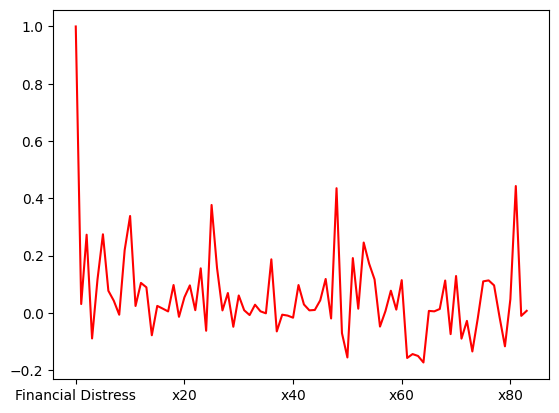

In [18]:
# Plot correlation of Financial Distress attribute with other attributes in dataset
corr_matrix['Financial Distress'].plot(c='red')
plt.show()

# Split the dataset

In [19]:
# Divide dataset as features and prediction attribute
X = data.drop(['Company', 'Time','Financial Distress'], axis = 1)
y = data['Financial Distress']
y

0       0.010636
1      -0.455970
2      -0.325390
3      -0.566570
4       1.357300
          ...   
3667    0.438020
3668    0.482410
3669    0.500770
3670    0.611030
3671    0.518650
Name: Financial Distress, Length: 3672, dtype: float64

# Transform y to make it categorical
## Here we can observe in above output that y is continuous.
## On the dataset source (kaggle) it is mentioned that 'The target variable is denoted by "Financial Distress" if it is greater than -0.50 the company should be considered as healthy (0). Otherwise, it would be regarded as financially distressed (1).'

In [20]:
y_mod = []
for entry in y:
    if entry > -0.5:
        # This means company is healthy
        y_mod.append(0)
    else:
        # This means company is distressed
        y_mod.append(1)

# Convert back to series
y_mod = pd.Series(y_mod)
y_mod

0       0
1       0
2       0
3       1
4       0
       ..
3667    0
3668    0
3669    0
3670    0
3671    0
Length: 3672, dtype: int64

# Use PCA for dimensionality reduction so that we can visualize the data

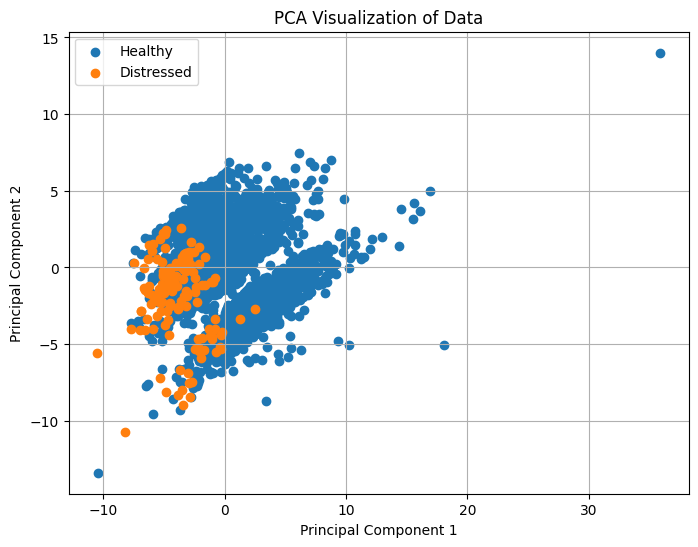

In [21]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA, Reduce to 2 dimensions for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Plot the reduced dimensional data
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[y_mod == 0, 0], X_pca[y_mod == 0, 1], label='Healthy')
plt.scatter(X_pca[y_mod == 1, 0], X_pca[y_mod == 1, 1], label='Distressed')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Visualization of Data')
plt.legend()
plt.grid(True)
plt.show()

In [22]:
# Split dataset into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y_mod, test_size= 0.3)

# Initialize and Train the model

In [23]:
def train_model(model, X_train, y_train):
    # Train the  model.

    model = model.fit(X_train, y_train)
    return model

def make_predictions(model, X_test):
    # Make predictions using the trained model on test data (unseen data).

    return model.predict(X_test)

def calculate_metrics(y_actual, y_pred):
    # Calculate precision, recall and f1 score.

    prec = precision_score(y_actual, y_pred)
    rec  = recall_score(y_actual, y_pred)
    f1   = f1_score(y_actual, y_pred)

    return prec, rec, f1

def print_results(model_name, prec, rec, f1):
    # Print the results.

    print(f"{model_name.ljust(28)} Precision: {prec:.2f}, Recall: {rec:.2f}, F1-score: {f1:.2f}")

In [29]:
# Initialize the models
nb_classifier  = GaussianNB()
knn_classifier = KNeighborsClassifier()
svm_classifier = SVC()
dt_classifier  = DecisionTreeClassifier()

In [30]:
# Train the models on training data
nb_classifier     = train_model(nb_classifier, X_train, y_train)
knn_classifier    = train_model(knn_classifier, X_train, y_train)
svm_classifier    = train_model(svm_classifier, X_train, y_train)
dt_classifier     = train_model(dt_classifier, X_train, y_train)

# Make Predictions on Test Data (Unseen data)

In [31]:
# Make predictions on unseen data (test data)
nb_classifier_pred  = make_predictions(nb_classifier, X_test)
knn_classifier_pred = make_predictions(knn_classifier, X_test)
svm_classifier_pred = make_predictions(svm_classifier, X_test)
dt_classifier_pred  = make_predictions(dt_classifier, X_test)

# Calculate Precision, Recall and F1 score

In [32]:
# Calculate precision, recall and f1 score
nb_classifier_prec, nb_classifier_rec, nb_classifier_f1       = calculate_metrics(y_test, nb_classifier_pred)
knn_classifier_prec, knn_classifier_rec, knn_classifier_f1    = calculate_metrics(y_test, knn_classifier_pred)
svm_classifier_prec, svm_classifier_prec, svm_classifier_f1   = calculate_metrics(y_test, svm_classifier_pred)
dt_classifier_prec, dt_classifier_rec, dt_classifier_f1       = calculate_metrics(y_test, dt_classifier_pred)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Print the obtained Results

In [33]:
# Print results
print_results("Naive Bayes Classifier:", nb_classifier_prec, nb_classifier_rec, nb_classifier_f1)
print_results("KNN Classifer:", knn_classifier_prec, knn_classifier_rec, knn_classifier_f1)
print_results("Support Vector Classifier:", svm_classifier_prec, svm_classifier_prec, svm_classifier_f1)
print_results("Decision Tree Classifier:", dt_classifier_prec, dt_classifier_rec, dt_classifier_f1)

Naive Bayes Classifier:      Precision: 0.04, Recall: 0.94, F1-score: 0.09
KNN Classifer:               Precision: 0.29, Recall: 0.04, F1-score: 0.07
Support Vector Classifier:   Precision: 0.00, Recall: 0.00, F1-score: 0.00
Decision Tree Classifier:    Precision: 0.23, Recall: 0.27, F1-score: 0.25


# Insights and Conclusion

### 1. Naive Bayes Classifier:
#### a) High Recall, Low Precision: Here we are able to observe very high recall (0.94) but precision is very low (0.04).
#### b) High recall means our model is effective to identifying distressed companies (positive class).
#### c) But our model's precision is very low (0.04) which means there are many false positives.
#### d) Conclusion : Naive Bayes performs poorly when dataset is highly imbalanced.

### 2. KNN Classifier:
#### a) In the case of KNN Classifier we are able to observe that Precision (0.29) is better than Naive bayes but Recall (0.04) is very poor.
#### b) This indicates that our model is able to predict only a small proportion of true positives.
#### c) Optimizing hyperparameters may increase performance.

### 3. Support Vector Classifier:
#### a) We are able to observe 0 perfomance across recall, precision and f1 score.
#### b) The model is not able to predict even one true positive instance correctly.
#### c) The main problem could be because as we observed earlier that the data is not linearly seperable (heavy overlap between two classes) and the dataset is highly imbalanced.
#### d) It shows SVM to be highly sensitive to data imbalance.

### 4. Decision Tree Classifier:
#### a) Decision tree model is able to perform better than other models.
#### b) To improve performance ensemble technique could be tried.